## Seaborn
minhdh, CoderSchool 2019

In [0]:
from IPython.display import HTML, display, display_markdown, Javascript
# Document: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.ProgressBar

In [0]:
# Refs: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
HTML('''
    <script>
      function code_toggle() {
        if (code_shown){
          $('div.input').hide('500');
          $('#toggleButton').val('Show Code')
        } else {
          $('div.input').show('500');
          $('#toggleButton').val('Hide Code')
        }
        code_shown = !code_shown
      }

      $( document ).ready(function(){
        code_shown=false;
        $('div.input').hide()
      });
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
    ''')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid") # white, whitegrid, dark, darkgrid, ticks

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
stats = pd.read_csv('gdrive/My Drive/CoderSchool-DAwP/DataViz/data/P4-Demographic-Data.csv')

In [0]:
stats.columns

Index(['Country Name', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group'],
      dtype='object')

In [0]:
stats.columns = ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers', 'IncomeGroup']
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


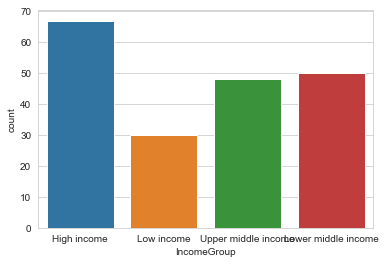

In [0]:
sns.countplot(stats['IncomeGroup'])
plt.show()

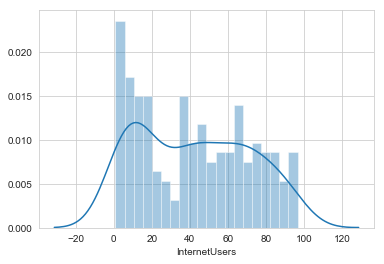

In [0]:
sns.distplot(stats['InternetUsers'], bins=20)
plt.show()

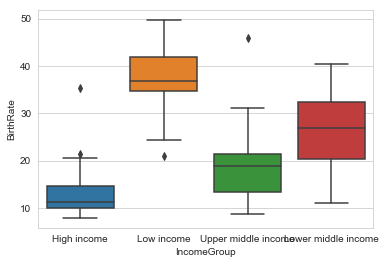

In [0]:
sns.boxplot(data=stats, x="IncomeGroup", y="BirthRate")
plt.show()

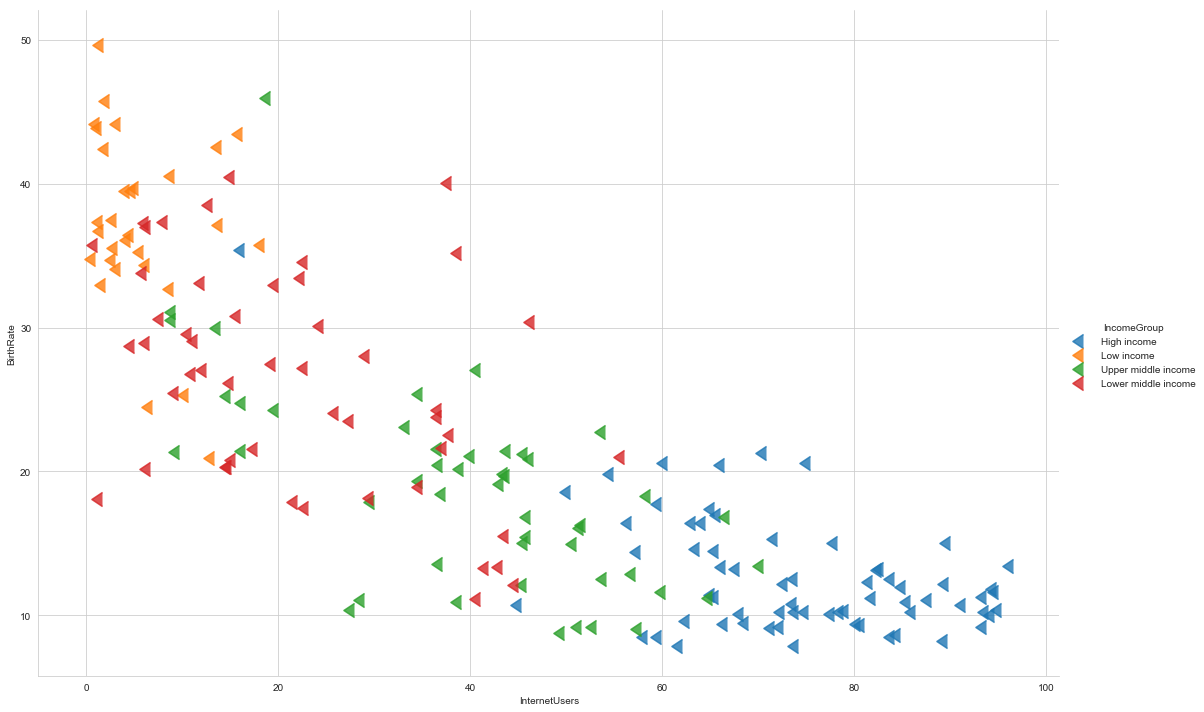

In [0]:
sns.lmplot(data=stats, x='InternetUsers', y='BirthRate',
           fit_reg=False, hue='IncomeGroup', size=10, aspect=1.5,
           scatter_kws={"s":200}, markers=8)
plt.show()

It looks like when people have internet, they don't have time to make kids, and when people don't have internet, they have a lot of times to create children. Correlation does not imply causation but interesting hypothesis. 

---
### Advanced Visualization


In [0]:
movies = pd.read_csv('gdrive/My Drive/CoderSchool-DAwP/DataViz/data/P4-Movie-Ratings.csv')

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [0]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [0]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [0]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


**Change type of Film, Genre, Year to categorical variables**

In [10]:
movies['Film'] = movies['Film'].astype('category')
movies['Genre'] = movies['Genre'].astype('category')
movies['Year'] = movies['Year'].astype('category')
movies['Genre'].cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

**Jointplots**

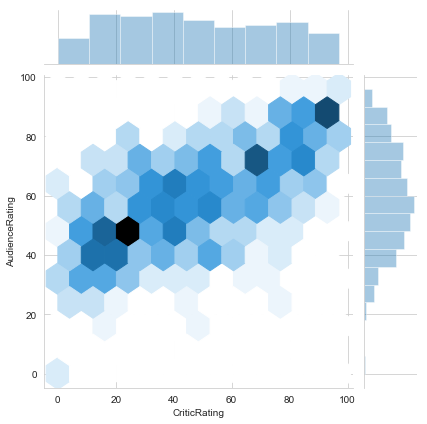

In [0]:
sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')
plt.show()

**Histogram**

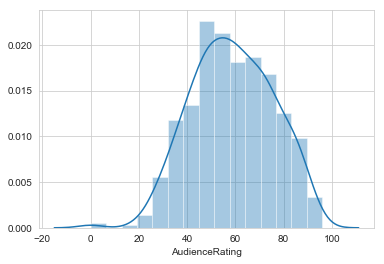

In [0]:
sns.distplot(movies.AudienceRating, bins=15)
plt.show()

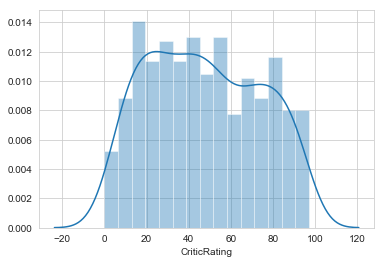

In [0]:
sns.distplot(movies.CriticRating, bins=15)
plt.show()

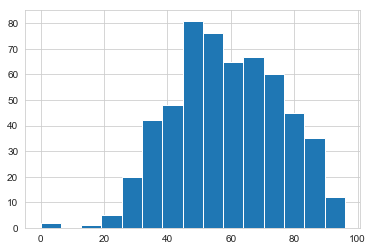

In [0]:
plt.hist(movies.AudienceRating, bins=15)
plt.show()

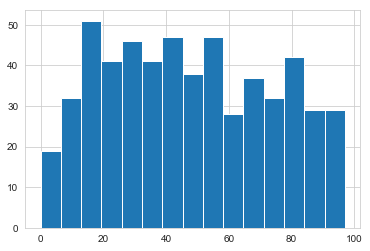

In [0]:
plt.hist(movies.CriticRating, bins=15)
plt.show()

**Stacked Histogram**

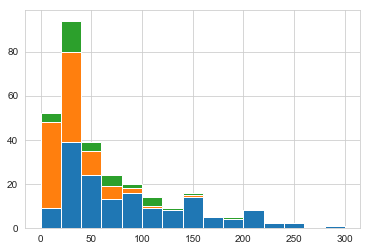

In [0]:
action_movie = movies[movies['Genre'] == 'Action']['BudgetMillions']
drama_movie = movies[movies['Genre'] == 'Drama']['BudgetMillions']
thriller_movie = movies[movies['Genre'] == 'Thriller']['BudgetMillions']

plt.hist([action_movie, drama_movie, thriller_movie], bins=15, stacked=True)
plt.show()

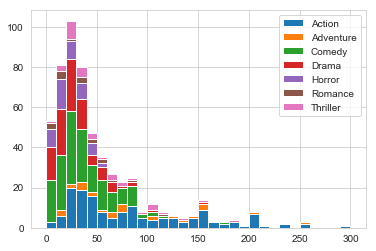

In [0]:
list1 = list()
myLabels = list( )
for genre in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre'] == genre]['BudgetMillions'])
    myLabels.append(genre)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)
plt.legend()
plt.show()

**Kernel Density Estimation plot**

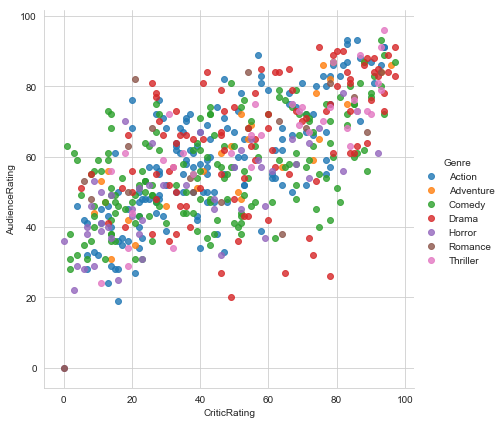

In [0]:
sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',
          fit_reg=False, hue='Genre', size=6, aspect=1)
plt.show()

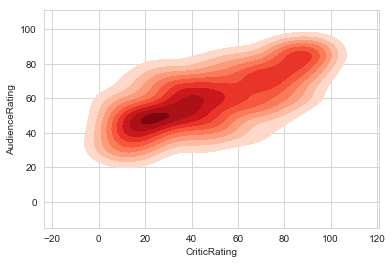

In [0]:
sns.kdeplot(movies['CriticRating'], movies['AudienceRating'],
           shade=True, shade_lowest=False, cmap='Reds')
plt.show()

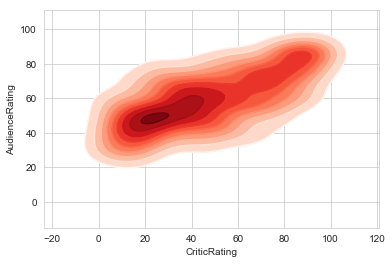

In [0]:
# Tricks:

sns.kdeplot(movies['CriticRating'], movies['AudienceRating'],
           shade=True, shade_lowest=False, cmap='Reds')

sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], cmap='Reds')
plt.show()

**Subplots**

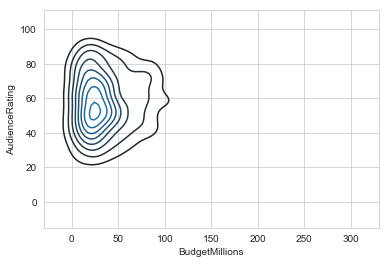

In [0]:
sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'])
plt.show()

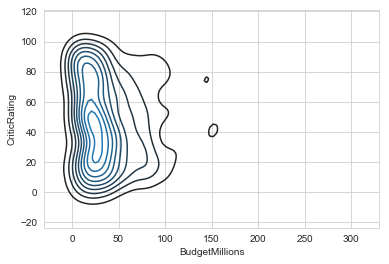

In [0]:
sns.kdeplot(movies.BudgetMillions, movies.CriticRating)
plt.show()

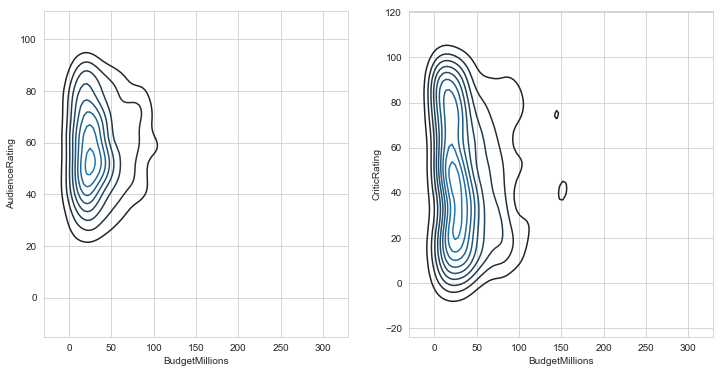

In [0]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

plt.show()

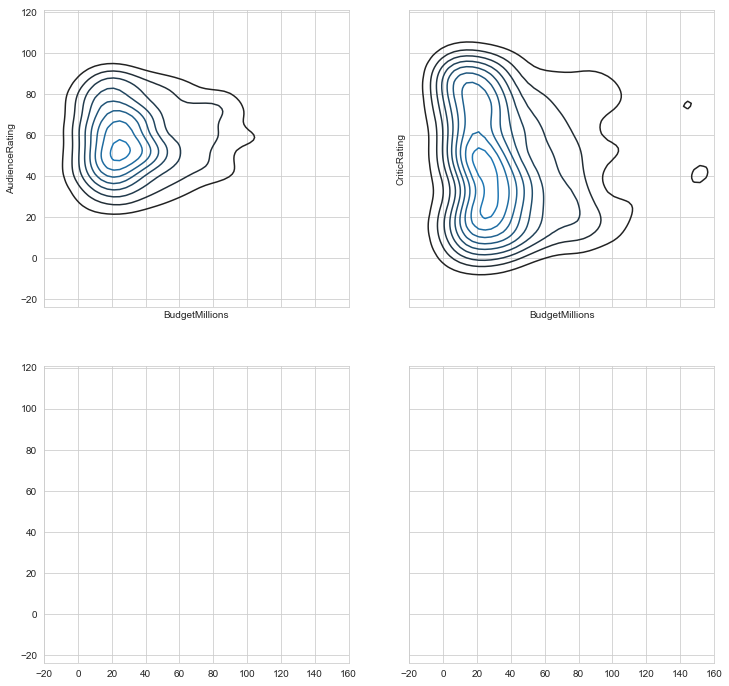

In [0]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1])

k1.set(xlim=(-20, 160))

plt.show()

**Box plot vs Violin plot vs Swarm plot**

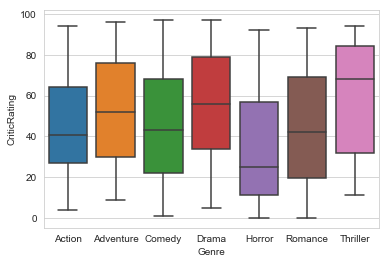

In [0]:
sns.boxplot(data=movies, x='Genre', y='CriticRating')
plt.show()

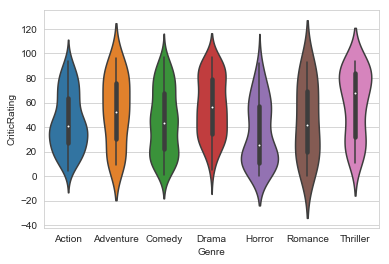

In [0]:
sns.violinplot(data=movies, x='Genre', y='CriticRating')
plt.show()

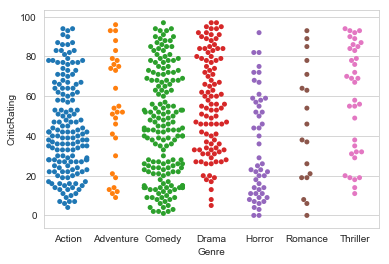

In [0]:
sns.swarmplot(data=movies, x='Genre', y='CriticRating')
plt.show()

**Createing a Facer Grid**

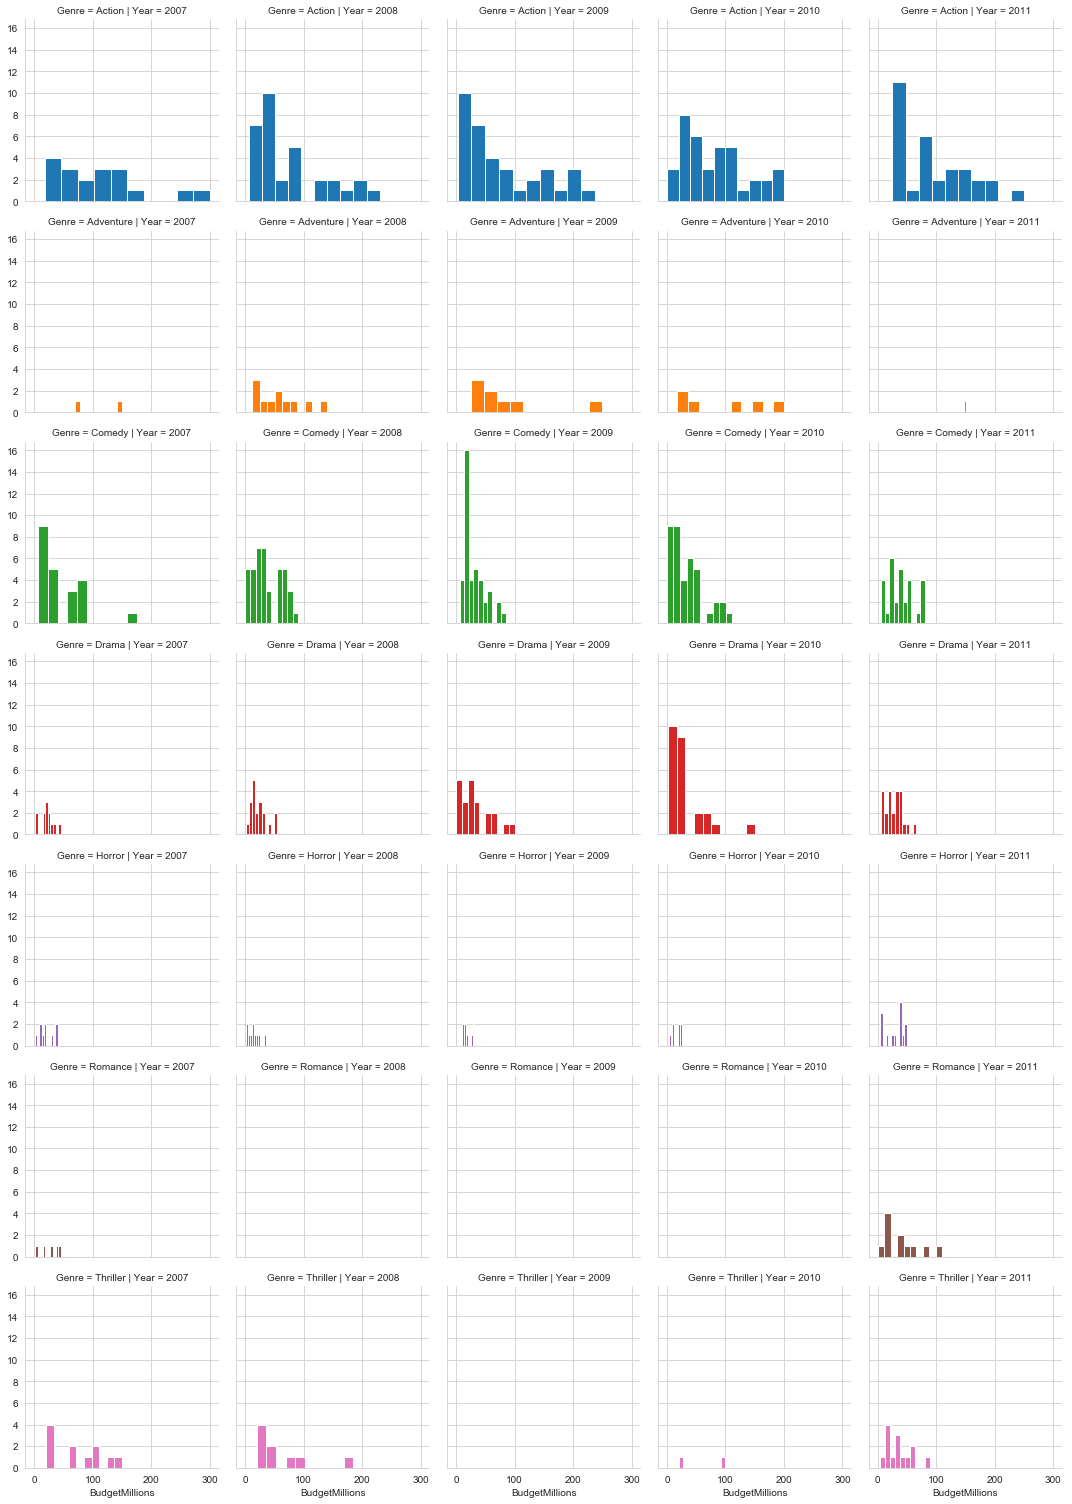

In [0]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')
plt.show()

*Adding diagonal*

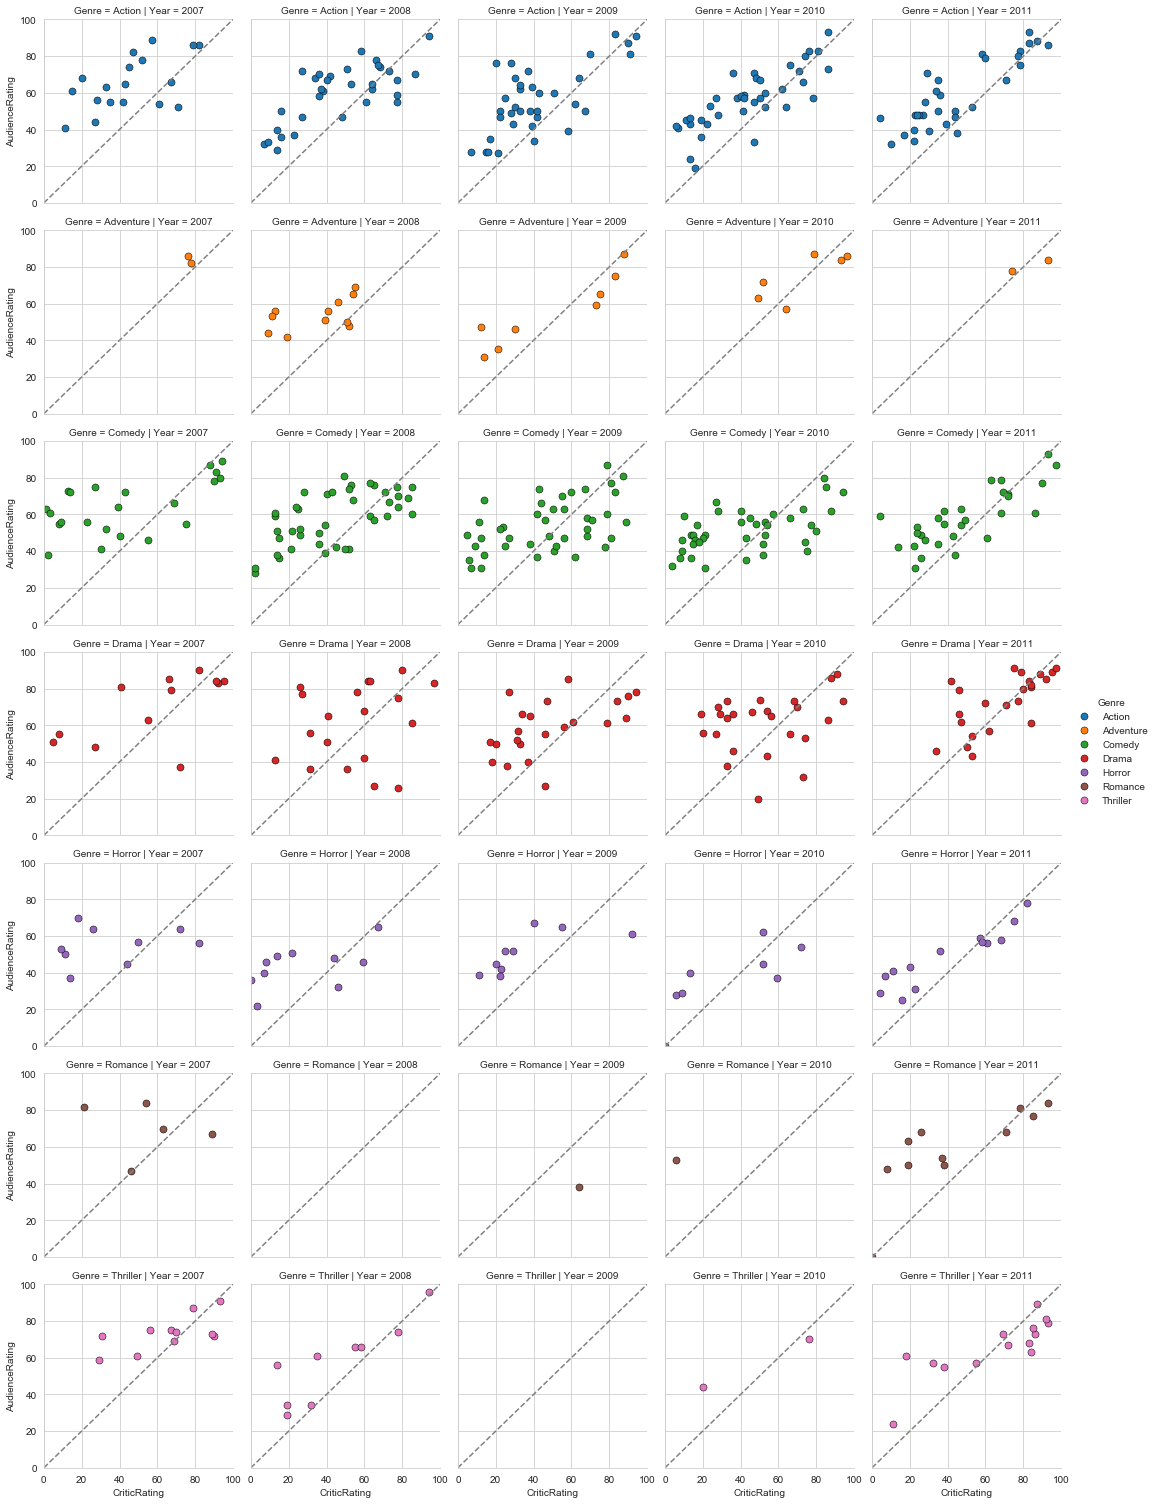

In [0]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0, 100), ylim=(0, 100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c='gray', ls='--')
g.add_legend()

plt.show()

**Building Dashboards**

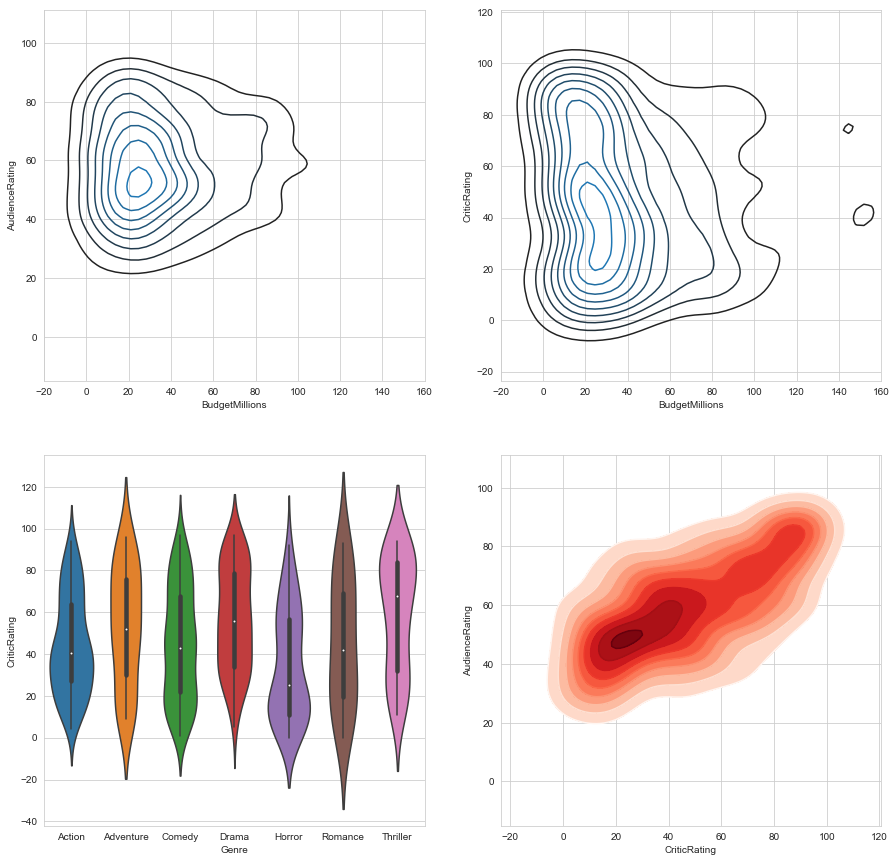

In [0]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1])
k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))

v = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 0])

kde = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
           shade=True, shade_lowest=False, cmap='Reds', ax=axes[1, 1])

kde2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1, 1])

# axes[1,1].hist(movies.CriticRating, bins=15)

plt.show()

**Styling Dashboards**

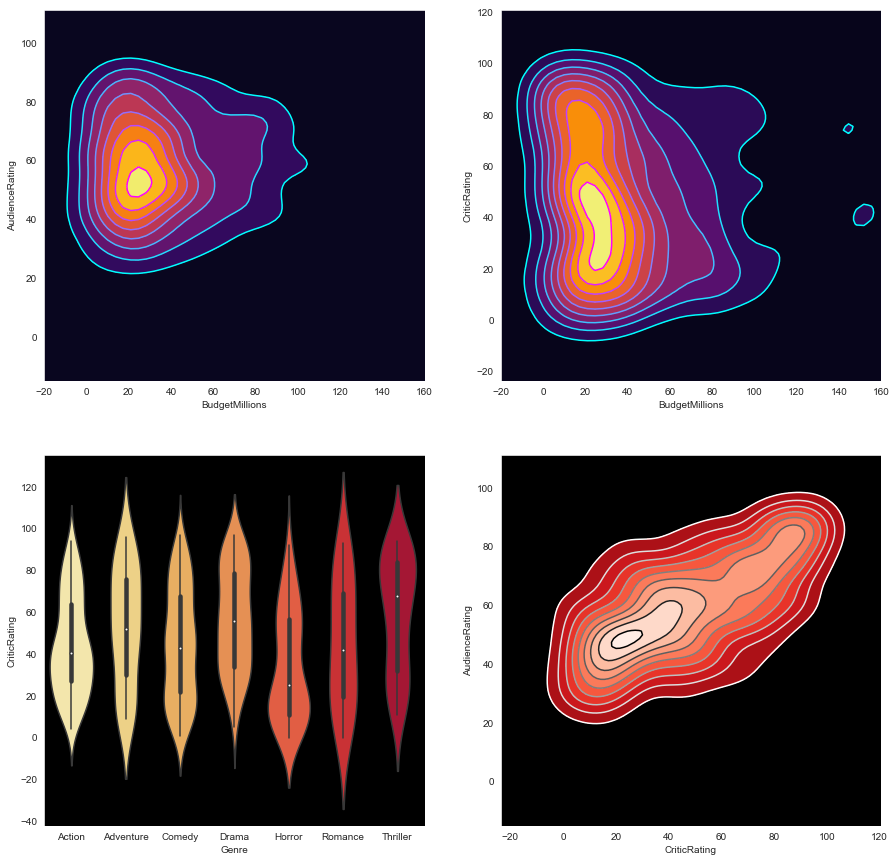

In [0]:
sns.set_style('dark', {"axes.facecolor": "black"})
f, axes = plt.subplots(2, 2, figsize=(15, 15))

# plot 0, 0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, 
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0, 0])
k1_ = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, 
                  cmap='cool', ax=axes[0, 0])

# plot 0, 1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, 
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0, 1])
k2_ = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, 
                  cmap='cool', ax=axes[0, 1])


k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))

v = sns.violinplot(data=movies, x='Genre', y='CriticRating', 
                   palette='YlOrRd', ax=axes[1, 0])

kde = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
           shade=True, shade_lowest=False, cmap='Reds_r', ax=axes[1, 1])

kde2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, 
                   cmap='gist_gray_r', ax=axes[1, 1])

# axes[1,1].hist(movies.CriticRating, bins=15)

plt.show()

---
### Thematic edit

First version:

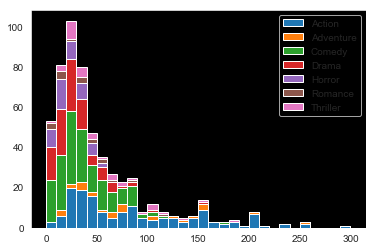

In [0]:
list1 = list()
myLabels = list( )
for genre in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre'] == genre].BudgetMillions)
    myLabels.append(genre)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)
plt.legend()
plt.show()

And the second one:

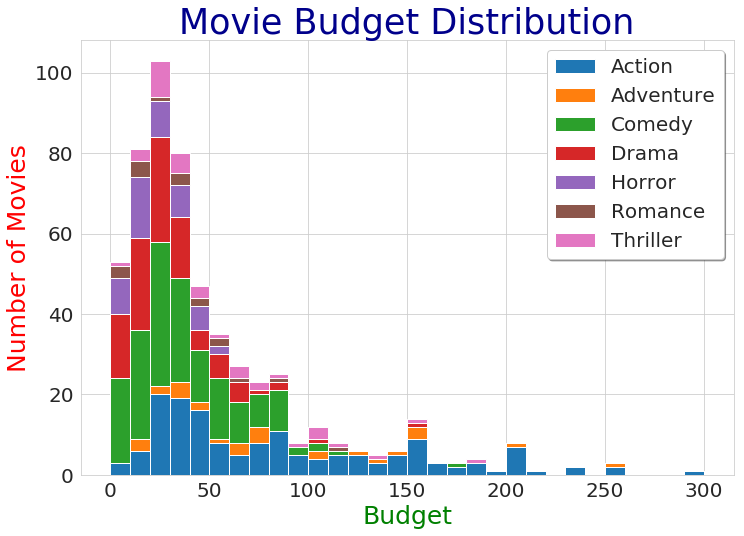

In [11]:
list1 = list()
myLabels = list( )
for genre in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre'] == genre].BudgetMillions)
    myLabels.append(genre)

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8,27)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)
#          color=['Red', 'Salmon', 'Blue', 'Red', 'Salmon', 'Blue', 'Red']

plt.title('Movie Budget Distribution', fontsize=35, color='DarkBlue',
         fontname='Console')
plt.ylabel('Number of Movies', fontsize=25, color="Red")
plt.xlabel('Budget', fontsize=25, color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, 
           prop={'size':20})
plt.show()

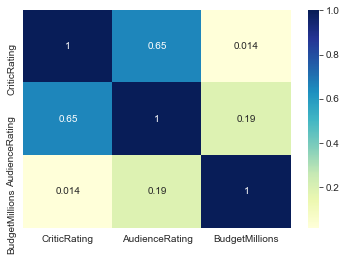

In [0]:
sns.heatmap(movies.corr(), annot=True, cmap='YlGnBu')

Comedy 172
Action 154
Drama 101
Horror 49
Thriller 36
Adventure 29
Romance 18


Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: Genre, dtype: int64

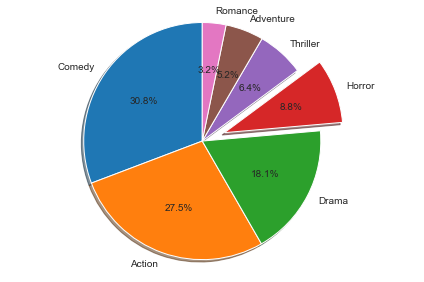

In [0]:
# Pie chart
labels = []
sizes = []
explode = []

labels = movies['Genre'].value_counts().index
for index, size in enumerate(movies['Genre'].value_counts()):
    sizes.append(size)
    if labels[index]=='Horror':
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Resources

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[Seaborn API Reference](https://seaborn.pydata.org/api.html)

[matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

[Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Markers API](https://matplotlib.org/api/markers_api.html)